# Title: Simple Random Forest for 507 Project
## Author: Diana Liang
## Date: 4/3/2020

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('food_health.csv')
data['is_1'] = data.health == 1
data['is_2'] = data.health == 2
data['is_3'] = data.health == 3
data['is_healthy'] = data.is_1 + data.is_2 + data.is_3

c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [8]:
del data['health']
del data['is_1']
del data['is_2']
del data['is_3']

In [9]:
X = data.iloc[:, :9]
Y = data.iloc[:, 9]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,
                                                   random_state=0)
miss_train = IterativeImputer(max_iter=100, random_state=0)
new_X_train = miss_train.fit_transform(X_train)
miss_test = IterativeImputer(max_iter=100, random_state=0)
new_X_test = miss_test.fit_transform(X_test)

In [9]:
s_oob = []
for each_num in [500, 1000, 5000]:
    for each_max in [2, 3, 4, 5]:
        tree = RandomForestClassifier(n_estimators=each_num,
                                      max_features=each_max,
                                      oob_score = True,
                                      random_state=0)
        tree.fit(new_X_train, Y_train)
        s_oob.append(tree.oob_score_)
        print('feat:', each_max, 'num:', each_num)

feat: 2 num: 500
feat: 3 num: 500
feat: 4 num: 500
feat: 5 num: 500
feat: 2 num: 1000
feat: 3 num: 1000
feat: 4 num: 1000
feat: 5 num: 1000
feat: 2 num: 5000
feat: 3 num: 5000
feat: 4 num: 5000
feat: 5 num: 5000


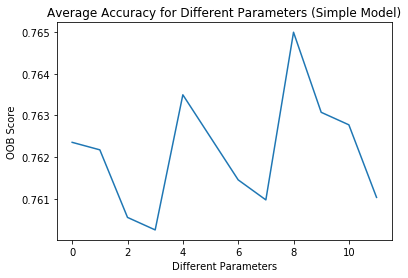

In [12]:
plt.plot(s_oob)
plt.title("Average Accuracy for Different Parameters (Simple Model)")
plt.xlabel("Different Parameters")
plt.ylabel("OOB Score")
#plt.savefig('simple_oob.png')

[0.7609764875239923,
 0.7649952015355086,
 0.7630758157389635,
 0.7627759117082533,
 0.7610364683301344]

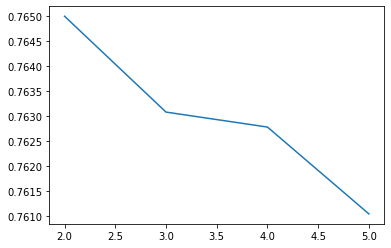

In [11]:
plt.plot([2, 3, 4, 5], s_oob[8:])
s_oob[7:]

In [11]:
model = RandomForestClassifier(n_estimators=5000,
                               max_features=2,
                               oob_score = True,
                               random_state=0)
model.fit(new_X_train, Y_train)
Y_pred = model.predict(new_X_test)
accuracy_score(Y_test, Y_pred)

0.7846735024284943

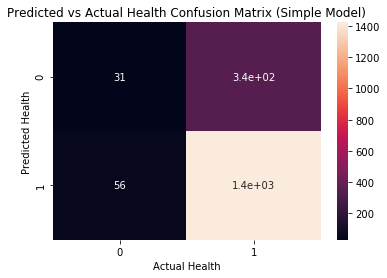

In [15]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)
plt.title("Predicted vs Actual Health Confusion Matrix (Simple Model)")
plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
#plt.savefig("simple_con_mat.png")

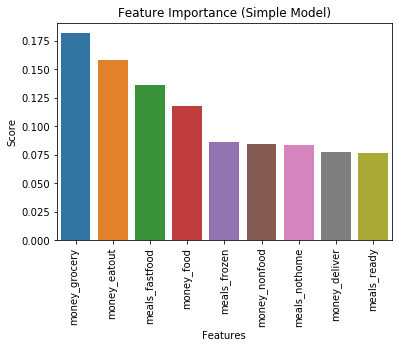

In [17]:
feat_import = pd.DataFrame({'Features': list(X.columns),
                            'Score': list(model.feature_importances_)}).sort_values(by='Score', ascending=False)
sns.barplot(x=feat_import.Features, y=feat_import.Score)
plt.title("Feature Importance (Simple Model)")
plt.xticks(rotation=90)
#plt.savefig("simple_var_imp.png")